In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.9 MB/s eta 0:00:00


# GA_BPNN 2 param

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from deap import base, creator, tools, algorithms

# Load your dataset (assuming it's in a CSV file)
df = pd.read_csv('/content/nep1 (3).csv')

# Extract features (temperature, humidity, precipitation, solar radiation) and target (influenza confirmed cases)
X = df[['tem', 'hum', 'pre', 'rad']].values
y = df['ConfirmedCases'].values

# Normalize features to the range [0, 1] using Min-Max scaling
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a fitness function to optimize
def fitness_function(individual):
    learning_rate, num_neurons = individual
    model = Sequential()
    model.add(Dense(num_neurons, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='linear'))
    model.add(Dense(1, activation='linear'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
    loss = model.evaluate(X_test, y_test, verbose=0)
    return loss,

# Define the genetic algorithm parameters
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.uniform, 0.0001, 0.1)  # Learning rate
toolbox.register("attr_int", np.random.randint, 8, 128)  # Number of neurons
toolbox.register("individual", tools.initCycle, creator.Individual, (toolbox.attr_float, toolbox.attr_int), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", fitness_function)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

if __name__ == "__main__":
    population_size = 10
    num_generations = 10

    population = toolbox.population(n=population_size)
    algorithms.eaMuPlusLambda(population, toolbox, mu=population_size, lambda_=population_size, cxpb=0.7, mutpb=0.3, ngen=num_generations, verbose=True)

    best_individual = tools.selBest(population, k=1)[0]
    best_learning_rate, best_num_neurons = best_individual

    print(f"Best Learning Rate: {best_learning_rate}")
    print(f"Best Number of Neurons: {best_num_neurons}")


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals
0  	10    
1  	10    
2  	10    
3  	10    
4  	10    
5  	10    
6  	10    
7  	10    
8  	10    
9  	10    
10 	10    
Best Learning Rate: 0.04847715655152535
Best Number of Neurons: 96.50813405234672


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load your dataset (assuming it's in a CSV file)
df = pd.read_csv('/content/nep1 (3).csv')

# Extract features (temperature, humidity, precipitation, solar radiation) and target (influenza confirmed cases)
X = df[['tem', 'hum', 'pre', 'rad']].values
y = df['ConfirmedCases'].values

# Normalize features to the range [0, 1] using Min-Max scaling
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Best hyperparameters obtained from the genetic algorithm
best_learning_rate = 0.05  # Replace with the best learning rate from your optimization
best_num_neurons = 96  # Replace with the best number of neurons from your optimization

# Create a sequential neural network model with the best parameters
model = Sequential()

# Add input layer and hidden layers
model.add(Dense(best_num_neurons, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='linear'))

# Add the output layer (1 neuron for regression)
model.add(Dense(1, activation='linear'))

# Compile the model with the best learning rate
model.compile(optimizer=Adam(learning_rate=best_learning_rate), loss='mean_squared_error')

# Train the model on the entire training dataset
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions on the test set
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')



Epoch 1/100
4/4 [==============================] - 1s 5ms/step - loss: 34802.9688
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 27515.7910
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 27027.3301
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 25620.8125
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 28692.2168
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 26209.5488
Epoch 7/100
4/4 [==============================] - 0s 6ms/step - loss: 28759.3633
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 25723.4453
Epoch 9/100
4/4 [==============================] - 0s 5ms/step - loss: 26734.5332
Epoch 10/100
4/4 [==============================] - 0s 5ms/step - loss: 24020.4023
Epoch 11/100
4/4 [==============================] - 0s 5ms/step - loss: 25966.2871
Epoch 12/100
4/4 [==============================] - 0s 4ms/step - loss: 24541.3359
Epoch 13/100


In [ ]:
from sklearn.metrics import mean_absolute_error
import numpy as np

def calculate_mape(y_true, y_pred):
    """
    Calculate Mean Absolute Percentage Error (MAPE).

    Parameters:
        y_true (numpy array): True values.
        y_pred (numpy array): Predicted values.

    Returns:
        float: MAPE in percentage notation.
    """
    # Calculate the MAE (Mean Absolute Error)
    mae = mean_absolute_error(y_true, y_pred)

    # Calculate the MAPE
    mape = (mae / np.mean(y_true)) * 100

    return mape

mape_result = calculate_mape(y_test,y_pred)
print(f"MAPE: {mape_result:.2f}%")

MAPE: 120.12%


# GA-BPNN 3 param

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from deap import base, creator, tools, algorithms

# Load your dataset (assuming it's in a CSV file)
df = pd.read_csv('/content/drive/MyDrive/IDO/IDO BASIC/Sri.csv')

# Extract features (temperature, humidity, precipitation, solar radiation) and target (influenza confirmed cases)
X = df[['tem', 'hum', 'pre', 'rad']].values
y = df['ConfirmedCases'].values

# Normalize features to the range [0, 1] using Min-Max scaling
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a fitness function to optimize
def fitness_function(individual):
    learning_rate, num_neurons, activation_func = individual
    model = Sequential()
    model.add(Dense(num_neurons, activation=activation_func, input_shape=(X_train.shape[1],)))
    model.add(Dense(32, activation=activation_func))
    model.add(Dense(16, activation='linear'))
    model.add(Dense(1, activation='linear'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
    loss = model.evaluate(X_test, y_test, verbose=0)
    return loss,

# Define the genetic algorithm parameters
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.uniform, 0.0001, 0.1)  # Learning rate
toolbox.register("attr_int", np.random.randint, 8, 128)  # Number of neurons
activation_functions = ['relu', 'sigmoid', 'tanh', 'linear']  # Define the activation functions you want to optimize
toolbox.register("attr_activation", np.random.choice, activation_functions)  # Activation function
toolbox.register("individual", tools.initCycle, creator.Individual, (toolbox.attr_float, toolbox.attr_int, toolbox.attr_activation), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", fitness_function)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

if __name__ == "__main__":
    population_size = 10
    num_generations = 10

    population = toolbox.population(n=population_size)
    #algorithms.eaMuPlusLambda(population, toolbox, mu=population_size, lambda_=population_size, cxpb=0.7, mutpb=0.3, ngen=num_generations, verbose=True)

    best_individual = tools.selBest(population, k=1)[0]
    best_learning_rate, best_num_neurons, best_activation_func = best_individual

    print(f"Best Learning Rate: {best_learning_rate}")
    print(f"Best Number of Neurons: {best_num_neurons}")
    print(f"Best Activation Function: {best_activation_func}")


Best Learning Rate: 0.0271053752745309
Best Number of Neurons: 77
Best Activation Function: relu


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [ ]:
test_size = 12  # Assuming you want to use the last 12 rows for testing

X_train = X[:-test_size]  # All rows except the last 12 for training
X_test = X[-test_size:]   # Last 12 rows for testing

y_train = y[:-test_size]  # Corresponding target values for training
y_test = y[-test_size:]   # Corresponding target values for testing

len(y_test)

12

In [ ]:

# Normalize features to the range [0, 1] using Min-Max scaling
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Best hyperparameters obtained from the genetic algorithm
best_learning_rate = 0.02  # Replace with the best learning rate from your optimization
best_num_neurons = 77  # Replace with the best number of neurons from your optimization

# Create a sequential neural network model with the best parameters
model = Sequential()

# Add input layer and hidden layers
model.add(Dense(best_num_neurons, activation='linear', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='linear'))
model.add(Dense(16, activation='linear'))

# Add the output layer (1 neuron for regression)
model.add(Dense(1, activation='relu'))

# Compile the model with the best learning rate
model.compile(optimizer=Adam(learning_rate=best_learning_rate), loss='mean_squared_error')

# Train the model on the entire training dataset
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions on the test set
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')


Epoch 1/100
5/5 [==============================] - 1s 2ms/step - loss: 14005.1279
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 11849.5430
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 10870.4531
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 11418.9326
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 11055.1387
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 11109.5020
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 10932.8965
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 11023.7607
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 11007.1348
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 10950.1436
Epoch 11/100
5/5 [==============================] - 0s 2ms/step - loss: 11073.7031
Epoch 12/100
5/5 [==============================] - 0s 2ms/step - loss: 10995.6924
Epoch 13/100


In [ ]:
y_pred1 = [element for row in y_pred for element in row]

from sklearn.metrics import mean_absolute_error
import numpy as np

def calculate_mape(y_test, y_pred1):
    """
    Calculate Mean Absolute Percentage Error (MAPE).

    Parameters:
        y_true (numpy array): True values.
        y_pred (numpy array): Predicted values.

    Returns:
        float: MAPE in percentage notation.
    """
    # Calculate the MAE (Mean Absolute Error)
    mae = mean_absolute_error(y_test, y_pred1)

    # Calculate the MAPE
    mape = (mae / np.mean(y_test)) * 100

    return mape

mape_result = calculate_mape(y_test,y_pred1)
print(f"MAPE: {mape_result:.2f}%")

MAPE: 83.94%


In [ ]:
y_pred1

[53.47637,
 59.774548,
 53.645836,
 66.97016,
 68.03019,
 66.93158,
 62.9631,
 64.77399,
 69.33636,
 69.05824,
 62.45088,
 48.068565]

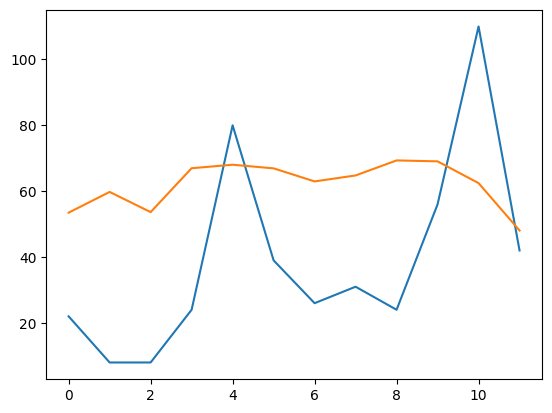

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y_test)
plt.plot(y_pred1)

In [ ]:
import csv

# Specify the file name for the CSV file
output_file = "/content/drive/MyDrive/IDO/sri_bpnn.csv"

# Open the CSV file in write mode
with open(output_file, mode='w', newline='') as file:
    # Create a CSV writer object
    writer = csv.writer(file)

    # Write the header if you have one
    # writer.writerow(["Prediction"])  # Uncomment this line if you want a header

    # Write each prediction to the CSV file
    for p in y_pred1:
        writer.writerow([p])

print(f"Predictions saved to {output_file}")

Predictions saved to /content/drive/MyDrive/IDO/sri_bpnn.csv
